In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
import cv2
from PIL import Image
import os
import random

from skimage import data
from skimage.color import rgb2hsv, rgb2gray
from utils import load_input_image
from segmentation import Segementation

In [2]:
def load_textures(folder="train2_solutions", path="data_project"):
    paths = os.path.join(path, folder)
    files = os.listdir(paths)
    list_textures = []
    for file in files:
        if file.startswith("solution"):
            im = Image.open(f"{paths}/{file}").convert("RGB")
            list_textures.append(np.array(im))
    return list_textures

In [3]:
textures = load_textures()

[71.7139191   8.15564612]
[[ 0.98919485 -0.14660679]
 [ 0.14660679  0.98919485]]
[1.36706833 4.13293167]
[[-0.99402894 -0.10911677]
 [ 0.10911677 -0.99402894]]
[13.72461655  5.57538345]
[[ 0.99232464  0.12366007]
 [-0.12366007  0.99232464]]
[6.21660919 1.38339081]
[[ 0.97733476 -0.2116997 ]
 [ 0.2116997   0.97733476]]
[3.65906748 8.97251147]
[[-0.95709203 -0.28978415]
 [ 0.28978415 -0.95709203]]
[36.59231904 41.80768096]
[[-0.87660581 -0.48120916]
 [ 0.48120916 -0.87660581]]
[9.55352479 1.19647521]
[[ 0.8028627  -0.59616398]
 [ 0.59616398  0.8028627 ]]
[10.62305753  0.79360914]
[[ 0.81045766 -0.58579721]
 [ 0.58579721  0.81045766]]
[59.34615385 53.57692308]
[[ 0.8  0.6]
 [-0.6  0.8]]
[0.5 0.5]
[[1. 0.]
 [0. 1.]]
[6.55909939 4.12271879]
[[ 0.78820544  0.61541221]
 [-0.61541221  0.78820544]]
[51.42307692 51.42307692]
[[1. 0.]
 [0. 1.]]
[8.34837628 0.65162372]
[[ 0.84135598 -0.54048138]
 [ 0.54048138  0.84135598]]
[67.42094978  5.00346231]
[[ 0.84540967  0.53411842]
 [-0.53411842  0.84540

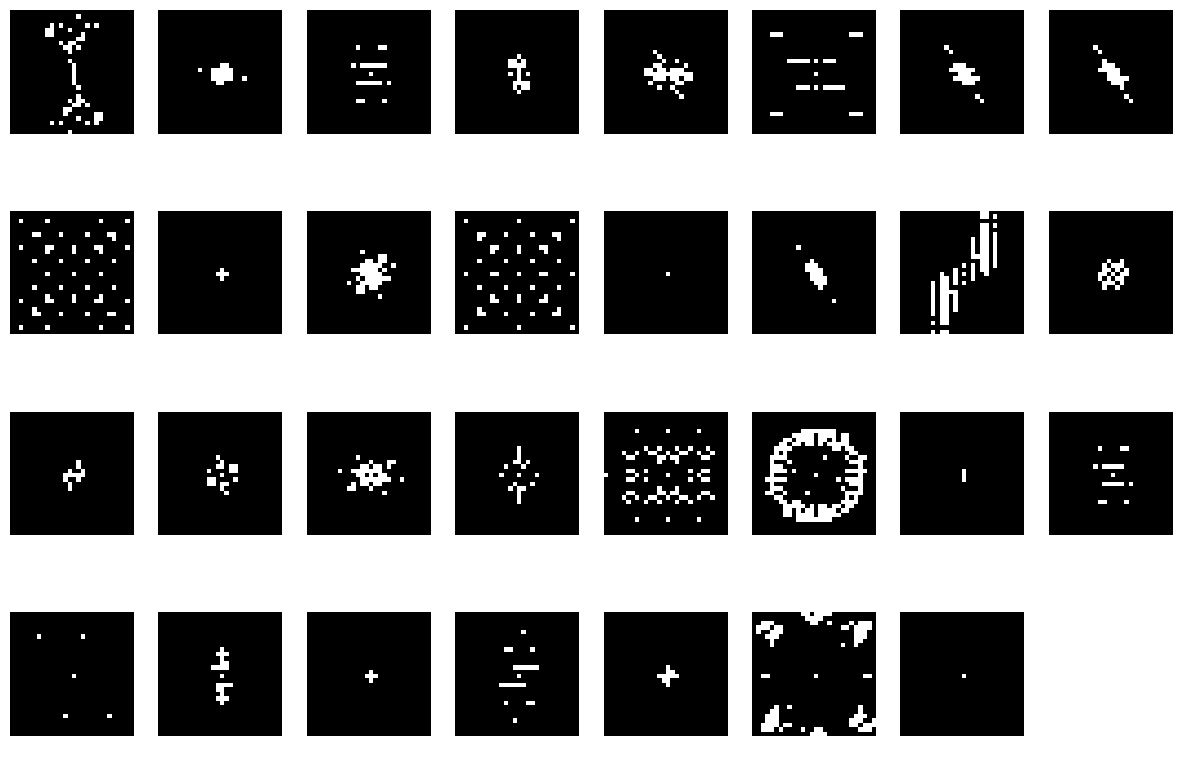

In [4]:
l = 0
fig, axes = plt.subplots(4, 8, figsize=(15, 10))
for img, ax in zip(textures, axes.ravel()):
    index1 = random.randint(0, 2 * 128)
    index2 = random.randint(0, 2 * 128)
    transform = np.fft.fft2(rgb2gray(img[index1 : 128 + index1, index2 : 128 + index2]))
    fshift = np.fft.fftshift(transform)
    bout_d_image = np.log(np.abs(fshift[50:-50, 50:-50]))
    # thresh1 = cv2.adaptiveThreshold(
    #     bout_d_image.astype("uint8"),
    #     np.max(bout_d_image),
    #     cv2.ADAPTIVE_THRESH_MEAN_C,
    #     cv2.THRESH_BINARY,
    #     51,
    #     0,
    # )

    binary_bout = bout_d_image > 5.5
    
    ax.imshow(bout_d_image>5.5, cmap="gray")

    ax.axis("off")
    
    if np.sum(binary_bout) <= 1:
        continue
    
    pos = (np.where(binary_bout))
    v = np.zeros((pos[0].shape[0], 2))
    v[:,0] = pos[0]
    v[:,1] = pos[1]

    cov = np.cov(v.T)

    eigval, eigvec = np.linalg.eig(cov)

    print(eigval)
    print(eigvec)

axes[3, 7].axis("off")
plt.show()

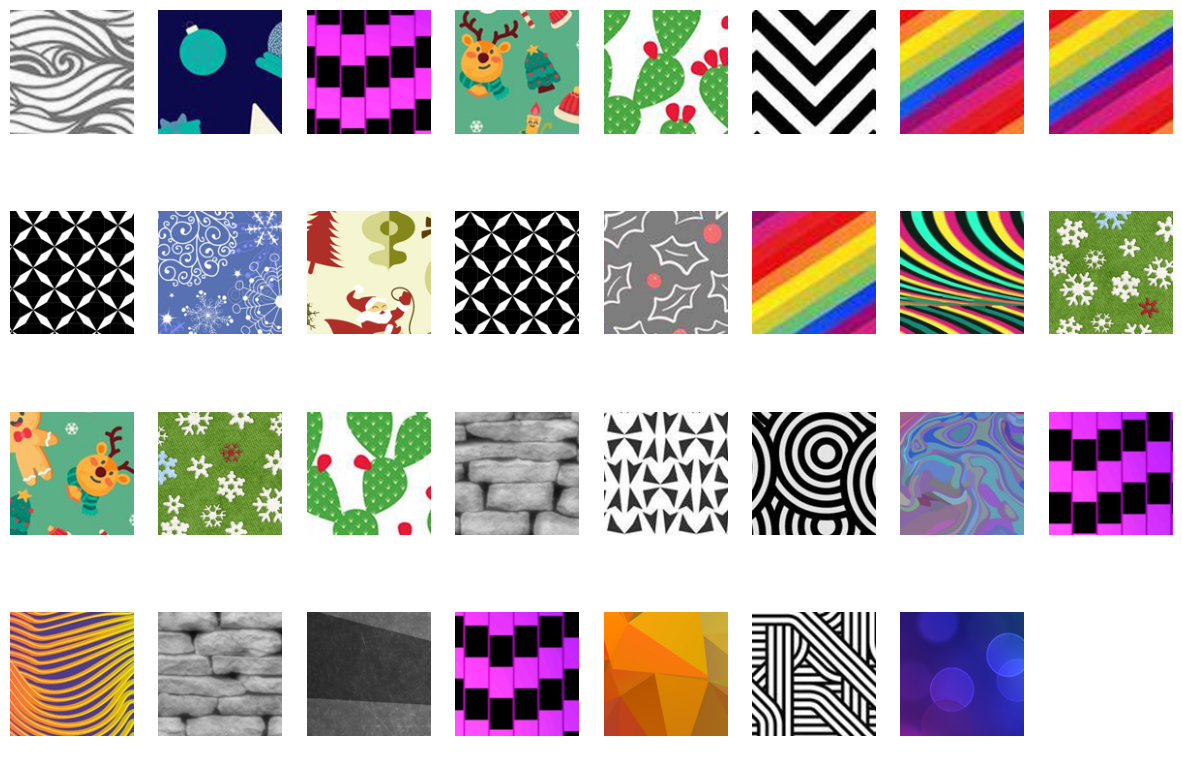

In [5]:
fig, axes = plt.subplots(4,8, figsize=(15,10))
for img,ax in zip(textures,axes.ravel()):
    index1 = random.randint(0, 2*128)
    index2 = random.randint(0, 2*128)
    ax.imshow(img[index1:128+index1,index2:128+index2])
    ax.axis("off")
axes[3,7].axis("off")
plt.show()

In [6]:
imgs = {i: load_input_image(i,folder="train2") for i in range(12)}

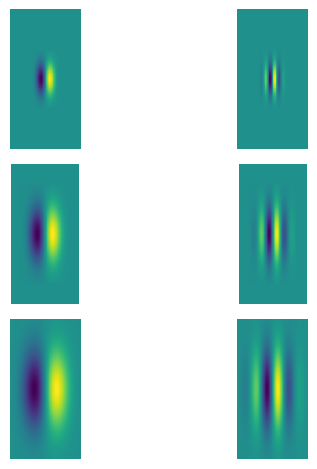

In [7]:
gamma = 0.5
phi = np.pi / 2
nth = 1
theta = 0

ksize = [20, 35, 50]
freqs = [1,3]

fig, axs = plt.subplots(len(ksize), len(freqs))
for i, k in enumerate(ksize):
    sigma = 2 * k / 10
    for j, f in enumerate(freqs):
        lamda = k / f
        kernel = cv2.getGaborKernel((k, 2*k), sigma, theta, lamda, gamma, phi)
        kernel_pad = np.pad(
            kernel,
            (
                ((max(ksize) - k) , (max(ksize) - k) ),
                ((max(ksize) - k) //2, (max(ksize) - k) // 2),
            ),
            constant_values=0,
        )
        axs[i, j].imshow(kernel_pad)
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

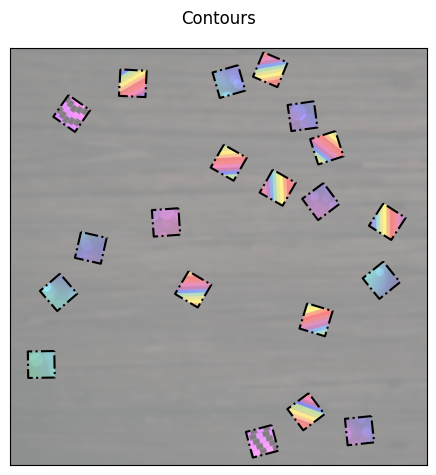

In [43]:
img = imgs[4]
seg = Segementation(img)
seg.find_pieces()
seg.plot_contours()

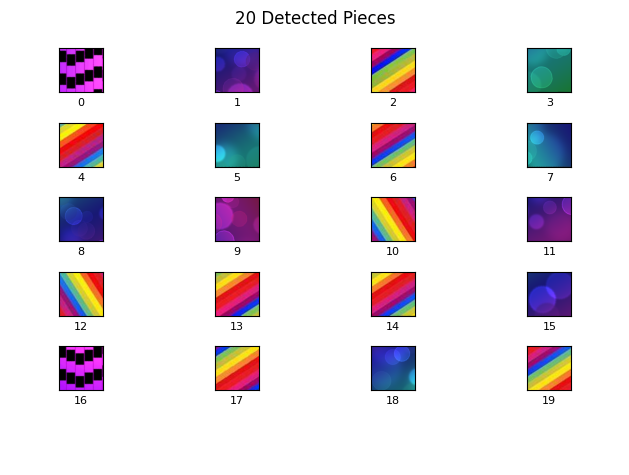

In [44]:
seg.plot_pieces()

In [98]:
#Piece 4
pieces_1 = [1,3,5,7,8,9,11,15,18]
pieces_2 = [2,4,6,10,12,13,14,17,19]
pieces_3 = []
outliers = [0,16]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

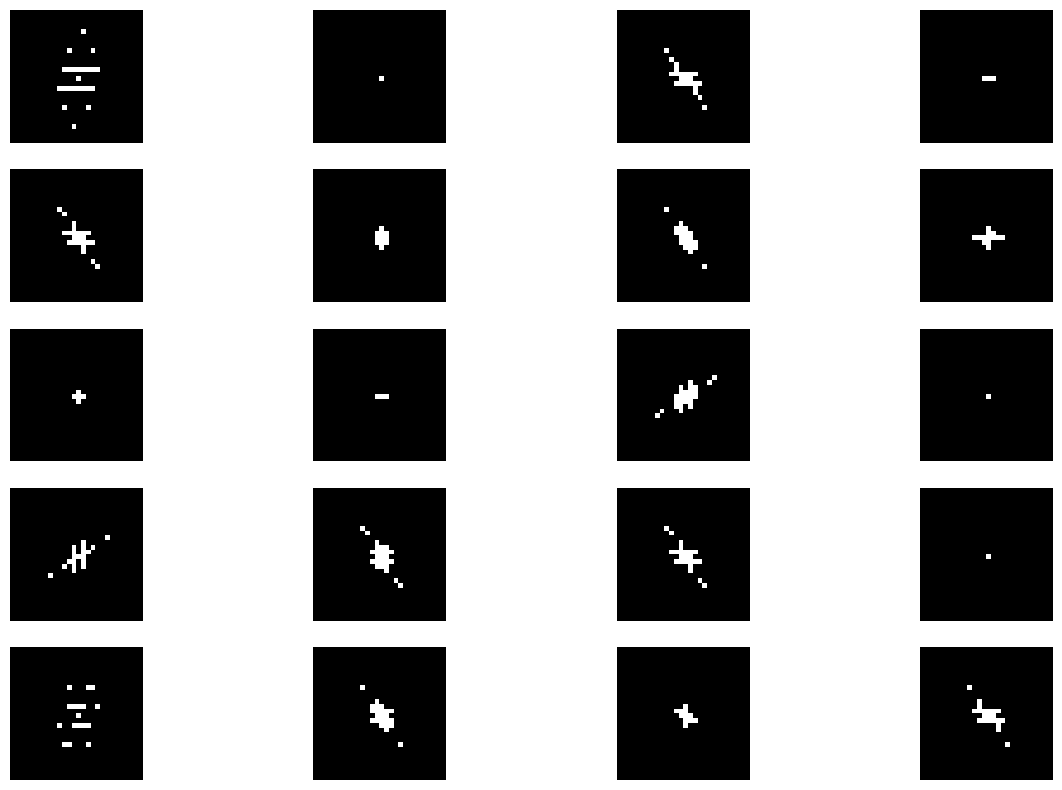

In [99]:
l = 0
fig, axes = plt.subplots(5, 4, figsize=(15, 10))
for img, ax in zip(seg.pieces, axes.ravel()):
    transform = np.fft.fft2(rgb2gray(img))
    fshift = np.fft.fftshift(transform)
    bout_d_image = np.log(np.abs(fshift[50:-50, 50:-50]))
    # thresh1 = cv2.adaptiveThreshold(
    #     bout_d_image.astype("uint8"),
    #     np.max(bout_d_image),
    #     cv2.ADAPTIVE_THRESH_MEAN_C,
    #     cv2.THRESH_BINARY,
    #     51,
    #     0,
    # )

    binary_bout = bout_d_image > 5.5
    
    ax.imshow(bout_d_image>5.5, cmap="gray")

    ax.axis("off")
    

plt.show()

In [76]:
v1 = np.array([-0.5, 2])
v2 = np.array([2, 0.5])



1.8157749899217608
0.24497866312686423


In [103]:
def get_features(img):
    # COLOR
    img_hsv = rgb2hsv(img)
    means = np.median(img, axis=(0, 1))
    std = np.std(img, axis=(0, 1))
    means_hsv = np.median(img_hsv, axis=(0, 1))
    std_hsv = np.std(img_hsv, axis=(0, 1))

    # FOURIER
    transform = np.fft.fft2(rgb2gray(img))
    fshift = np.fft.fftshift(transform)
    

    ft_mean = np.mean(np.log(np.abs(fshift[50:-50, 50:-50])))
    ft_std = np.std(np.log(np.abs(fshift[50:-50, 50:-50])))

    logfshfit = np.log(np.abs(fshift[50:-50, 50:-50])) > 5.5
    pos = (np.where(logfshfit))
    v = np.zeros((pos[0].shape[0], 2))
    v[:,0] = pos[0]
    v[:,1] = pos[1]
    
    eigval = np.array([1,1])
    eigvec = np.array([[1, 0], [0, 1]])
    n_nonzero = 0

    if np.sum(logfshfit) > 1:

        cov = np.cov(v.T)
        
        eigval, eigvec = np.linalg.eig(cov)

        n_nonzero = np.count_nonzero(logfshfit)


    v = eigvec[0]
    if np.abs(eigval[1]) > np.abs(eigval[0]):
        v = eigvec[1]

    angle = np.arctan2(v[1], v[0]) % (np.pi / 2)

    # GABOR
    gamma = 0.5
    phi = np.pi / 2
    ksizes = [20, 40, 60]
    nth = 24
    thetas = np.linspace(0, 2*np.pi, nth)
    freqs = [1, 3]

    means_gabor = []
    std_gabor = []
    thetas_max = []
    for ksize in ksizes:
        sigma = 2 * ksize / 10
        for f in freqs:
            lamda = ksize / f
            mean_max = np.zeros((1,3))
            std_max = np.zeros((1,3))
            theta_max = 0
            for theta in thetas:
                kernel = cv2.getGaborKernel(
                    (ksize, 2*ksize), sigma, theta, lamda, gamma, phi
                )
                f_img = cv2.filter2D(rgb2hsv(img), cv2.CV_8UC3, kernel)
                means_f = np.mean(np.abs(f_img), axis=(0, 1))
                if np.sum(means_f) > np.sum(mean_max):
                    std_max = np.std(np.abs(f_img), axis=(0, 1))
                    theta_max = theta
                    mean_max = means_f
            means_gabor.extend(list(mean_max))
            std_gabor.extend(list(std_max))
            thetas_max.append(theta_max % (np.pi / 2))

    
    return np.hstack(
        [
            means,
            std,
            means_hsv,
            std_hsv,
            means_gabor,
            std_gabor,
            thetas_max,
            ft_mean,
            ft_std,
            eigval.ravel(),
            angle,
            n_nonzero
        ]
    )

In [104]:
features = np.array([get_features(seg.pieces[i]) for i in range(len(seg.pieces))])
features = (features - np.mean(features, axis=0)) / np.maximum(1e-10, np.std(features, axis=0))
features.shape

(20, 60)

In [105]:
from sklearn.decomposition import PCA, KernelPCA

pca = KernelPCA(n_components=3,kernel="rbf")
features_PCA = pca.fit_transform(features)
#print(pca.explained_variance_ratio_)

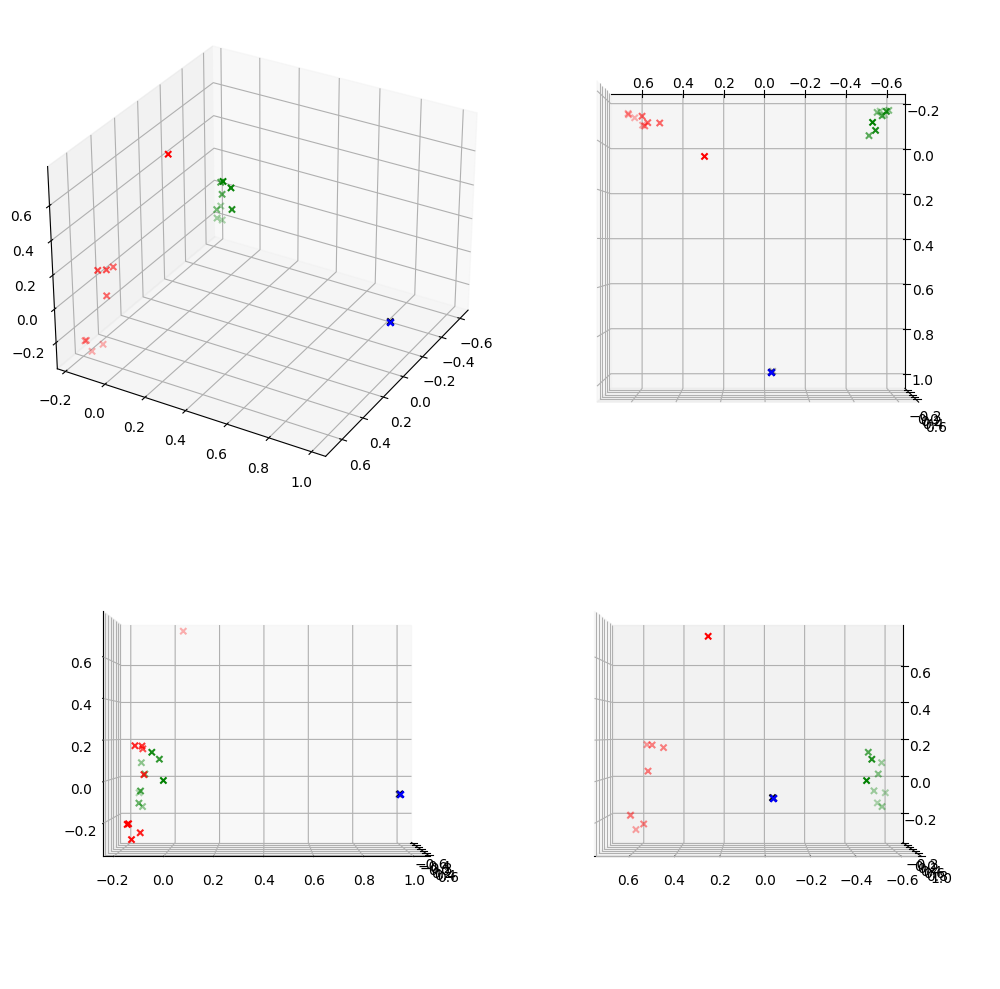

In [106]:
import matplotlib.pyplot as plt

colors = ["r", "g", "b", "k", "c", "m"]
orientation = [(30, 30), (90, 90), (0, 0), (0, 90)]

fig = plt.figure(figsize=(10, 10))
for i, o in enumerate(orientation):
    ax = fig.add_subplot(2, 2, i + 1, projection="3d")
    for j, index in enumerate(indexes):
        ax.scatter(*features_PCA[index].T, c=colors[j], marker="x")
        ax.scatter(*features_PCA[0].T, c='b', marker="x")
        ax.view_init(elev=o[0], azim=o[1])

plt.tight_layout()
plt.show()

In [84]:
from sklearn.mixture import GaussianMixture
gm =GaussianMixture(n_components=3)
labels = gm.fit_predict(features_PCA)
labels

array([1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

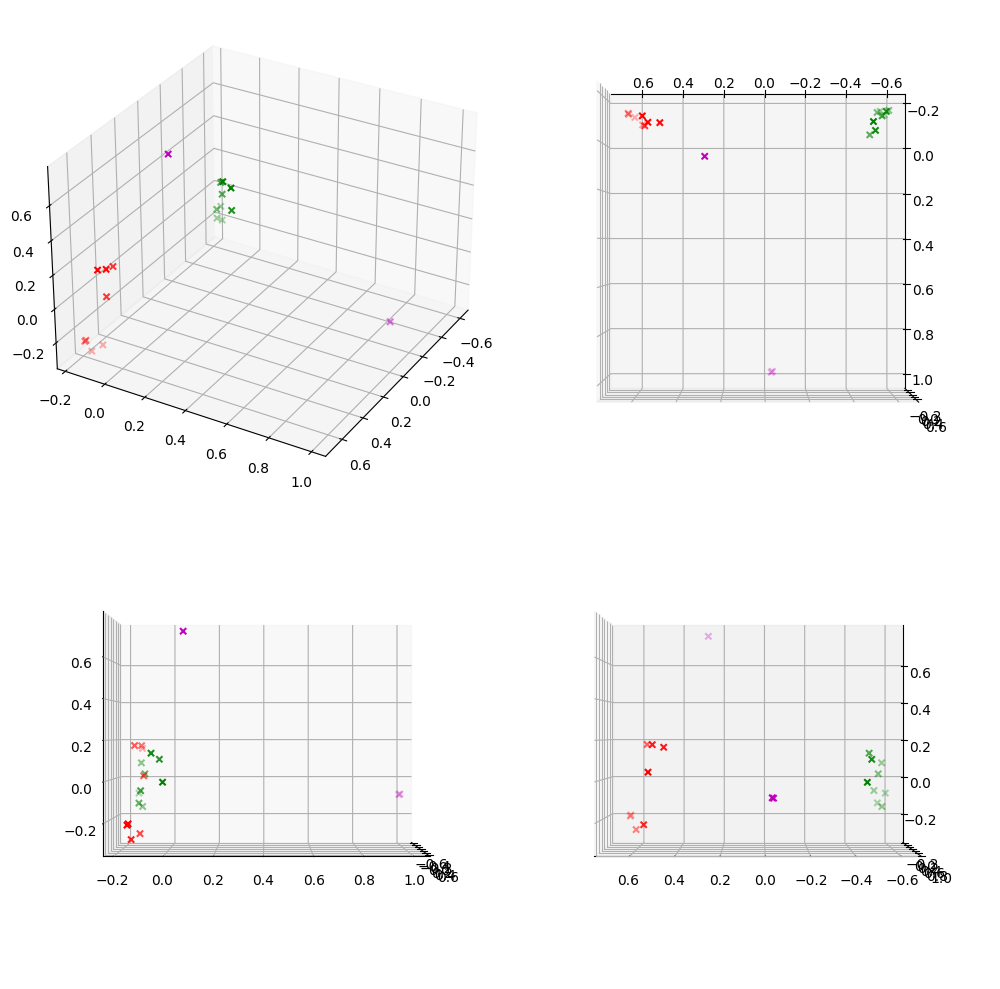

In [88]:
fig = plt.figure(figsize=(10,10))


for i, o in enumerate(orientation):
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    for label in np.unique(labels):
        ax.scatter(*features_PCA[labels==label].T, c=colors[label], marker='x')
        ax.view_init(elev=o[0], azim=o[1])

plt.tight_layout()
plt.show()

In [86]:
from sklearn.cluster import OPTICS, DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=3)
labels = clustering.fit_predict(features_PCA)
labels

array([-1,  0,  1,  0,  1,  0,  1, -1,  0,  0,  1,  0,  1,  1,  1,  0, -1,
        1,  0,  1])

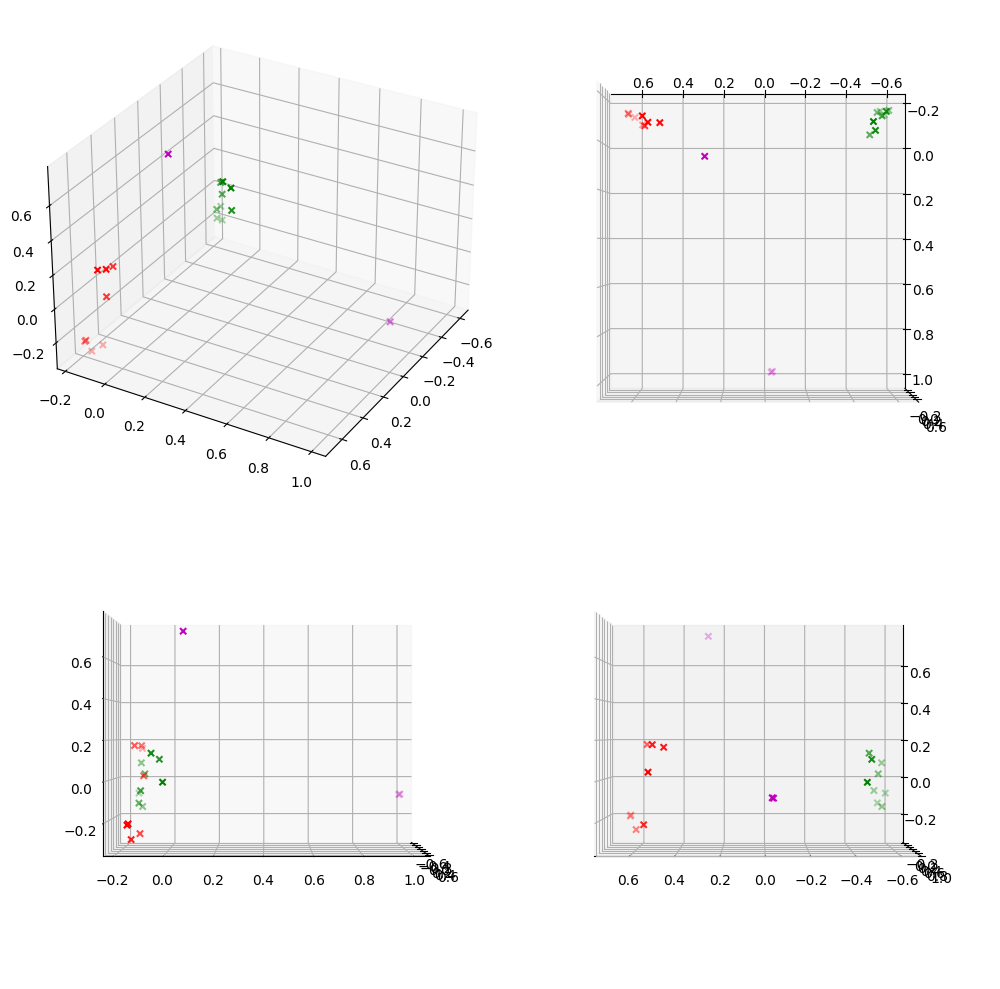

In [87]:
fig = plt.figure(figsize=(10,10))
for i, o in enumerate(orientation):
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    for label in np.unique(labels):
        ax.scatter(*features_PCA[labels==label].T, c=colors[label], marker='x')
        ax.view_init(elev=o[0], azim=o[1])

plt.tight_layout()
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10)
labels = kmeans.fit_predict(features_PCA)
labels

array([2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1],
      dtype=int32)

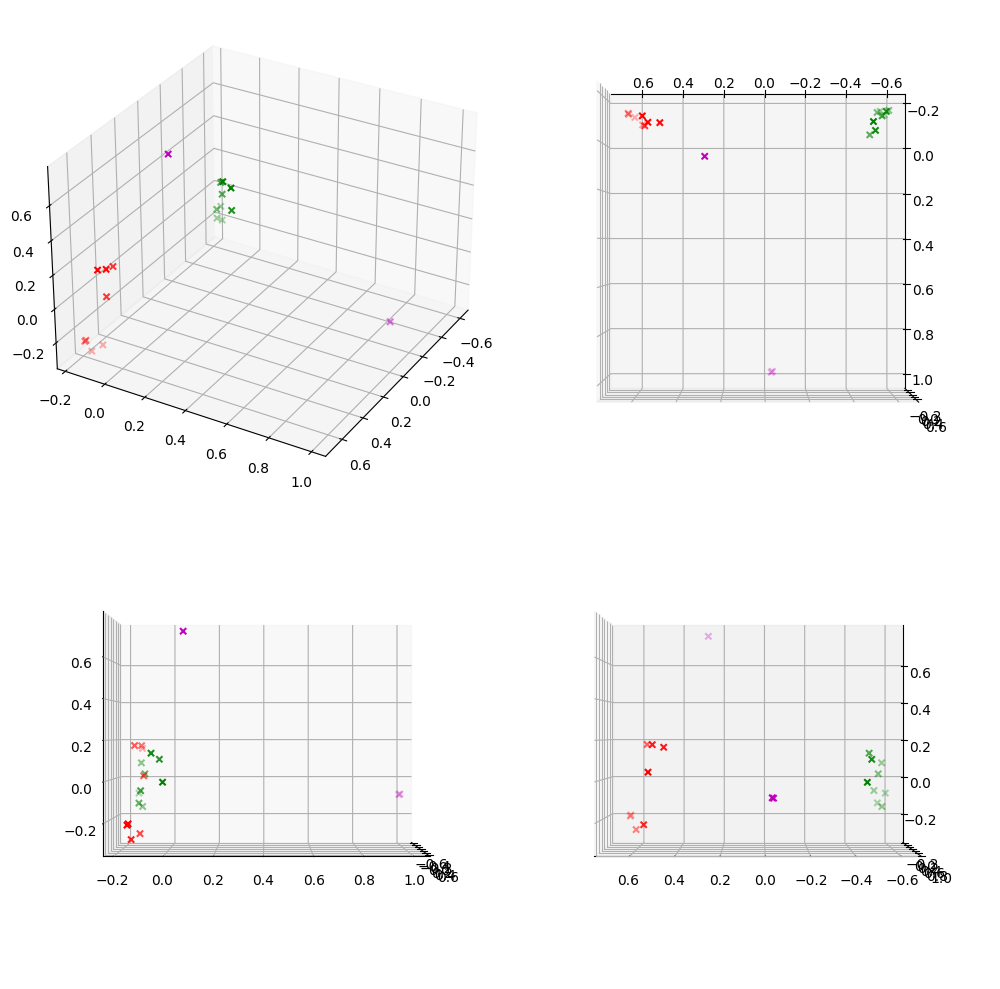

In [89]:
fig = plt.figure(figsize=(10,10))
for i, o in enumerate(orientation):
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    for label in np.unique(labels):
        ax.scatter(*features_PCA[labels==label].T, c=colors[label], marker='x')
        ax.view_init(elev=o[0], azim=o[1])

plt.tight_layout()
plt.show()

In [21]:
#Piece 0
pieces_1 = [0,2,8,9,10,12,13,14,19]
pieces_2 = [1,5,6,11,16,21,22,25,26]
pieces_3 = [3,4,7,15,17,18,20,24,27]
outliers = [23]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [22]:
#Piece 1 
pieces_1 = [2,7,4,8,10,11,12,12,14]
pieces_2 = [0,1,5,6,9,15,16,17,19]
pieces_3 = []
outliers = [3,18,20]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [23]:
#Piece 2 
pieces_1 = [2,5,6,17,19,20,22,23,24]
pieces_2 = [1,4,9,13,15,18,21,25,26]
pieces_3 = [3,7,8,10,11,12,14,16,27]
outliers = [0]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [30]:
#Piece 3
pieces_1 = [0,1,2,5,11,12,13,16,17]
pieces_2 = [3,4,6,7,8,9,15,18,20]
pieces_3 = []
outliers = [10,14,19]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [96]:
#Piece 4
pieces_1 = [1,3,5,7,8,9,11,15,18]
pieces_2 = [2,4,6,10,12,13,14,17,19]
pieces_3 = []
outliers = [0,16]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [10]:
#Piece 5
pieces_1 = [3,4,6,7,9,10,15,19,24]
pieces_2 = [0,8,12,14,16,17,18,20,26]
pieces_3 = [1,2,5,11,13,21,22,23,27]
outliers = [25]
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [27]:
#Piece 10
pieces_1 = [0,1,8,12,14,17,18,20,22]
pieces_2 = [2,3,4,9,10,15,16,21,23]
pieces_3 = [5,6,7,11,13,19,25,26,27]
outliers = []
indexes = [pieces_1,pieces_2,pieces_3,outliers]

In [20]:
#Piece 11
pieces_1 = [1,2,5,6,9,11,14,15,18]
pieces_2 = [3,4,7,8,10,12,13,16,17]
pieces_3 = []
outliers = [0]
indexes = [pieces_1,pieces_2,pieces_3,outliers]